In [1]:
import numpy as np
import keras
import keras.layers as layers
import matplotlib.pyplot as plt

Using TensorFlow backend.


## TwoLayerNN class

In [65]:
class TwoLayerNN:            #with single output
    
     def __init__(self, d1,d2):
        self.d1=d1
        self.d2=d2
            
        #weights
        self.W1=2*np.random.uniform(0,1,(self.d1,self.d2))-1  # (d1,d2), i-th column contains weights for the i-th neuron of the 2nd layer
        self.W2=2*np.random.uniform(0,1,self.d2)-1  # (d2,) this column contains the weights for the last layer neuron
        
        #biases
        self.biases2=2*np.random.uniform(0,1,self.d2)-1 #(d2,)
        self.bias3=2*np.random.uniform(0,1)-1      #(1,)
        
     def feedForward(self,minibatch):
         self.minibatch=minibatch
         size=self.minibatch.shape[0]
         minibatch_values=np.zeros(size)
         self.net_layer2=np.dot(self.minibatch,self.W1)+self.biases2   # shape is (# of vectors in minibatch, d2)
         self.layer2 = np.maximum(self.net_layer2,0)
         minibatch_values= np.dot(self.layer2,self.W2) + self.bias3  #number 
         return minibatch_values #(sth,)
     
     def backpropagation(self,minibatch,desired_output):
         self.B=minibatch #(size,d1)
         self.y=desired_output #(size,)
         
         size=self.B.shape[0] # the total number of vectors contained in the minibatch
         
         self.delta2 = 2*(self.feedForward(self.B)-self.y)  # (size,)-(size,) ok
         self.delta1 = self.delta2[:,np.newaxis] @ self.W2[np.newaxis,:]    # (size,d2) ok
        
         #grad_W2_C_B_f
         grad_W2_C_B_f = (self.layer2).T * self.delta2   #(d2,size) where each column contains grad_W2_C_f for each of the |B| vectors
         grad_W2_C_B_f= (1/size)*np.sum(grad_W2_C_B_f, axis=1)  #ok
         
         #grad_W1_C_B_f
         grad_W1_C_B_f = (1/size)* (self.B.T @ (self.delta1 * np.where(self.net_layer2>=0,1,0) ))   #(d1,d2)
         
         #grad_b3_C_B_f
         grad_bias3_C_B_f = (1/size)*(np.sum(self.delta2)) #number
         
         #grad_b2_C_B_f
         grad_biases2_C_B_f = self.delta1 * np.where(self.net_layer2>=0,1,0)
         grad_biases2_C_B_f = (1/size)*np.sum(grad_biases2_C_B_f,axis=0)
         
         return grad_W2_C_B_f, grad_W1_C_B_f, grad_bias3_C_B_f, grad_biases2_C_B_f

     def draw_random_minibatch(self,data_set,minibatch_size):
         self.D = data_set
         self.K = minibatch_size
         j = np.random.choice(self.D.shape[0],self.K,False) 
                                    # "False" ensures that we wont get the same index twice
         random_minibatch =  self.D[j]
         return j, random_minibatch
        
     def sgd(self,data_set,desired_output,learning_rate,minibatch_size,steps):
         self.D = data_set
         self.out = desired_output
         self.nu = learning_rate
         self.K = minibatch_size
         self.S = steps
        
         for i in range(self.S):
            j,B=self.draw_random_minibatch(self.D,self.K)
            
            f_B=self.feedForward(B)
            
            gradW2, gradW1, gradb3, gradb2 = self.backpropagation(B,self.out[j]) 
            
            self.W1 = self.W1 - self.nu * gradW1
            self.W2 = self.W2 - self.nu * gradW2
            self.bias3 = self.bias3 - self.nu * gradb3
            self.biases2 = self.biases2 - self.nu * gradb2
         
         return f_B, self.W1, self.W2, self.bias3, self.biases2

## Application on data classification

We draw 250 uniformly distributed
points in R^2 with norm  ≤ 1 and label them by yi = −1 and then another
250 uniformly distributed points x^i
in R2 with norm between 1 and 2 and label them
by yi = 1.

We use the two-Layer neural network with d2 = 20 hidden layer
neurons, S = 50000 iterations and K = 20 to classify the data.

learning rate  0.1
squares error vector : [105.27598504  78.87792264  96.84425257  89.6236311   99.48475778
  74.936631    96.61573858  87.96103926  96.994438  ]
accuracy on train set : 0.9771428571428571
accuracy on test set : 0.9333333333333333
--------------------------------------------------------------------------------------------------------
learning rate  0.30000000000000004
squares error vector : [116.72542311  72.5571022   63.42182254  62.56811104  87.25760329
 174.86305194  63.74940012 128.4535592  126.50116598]
accuracy on train set : 0.9114285714285715
accuracy on test set : 0.8666666666666667
--------------------------------------------------------------------------------------------------------
learning rate  0.5
squares error vector : [310.85022092 300.45288608 316.43655012 387.5        387.5
 360.         360.         350.         351.5       ]
accuracy on train set : 0.5142857142857142
accuracy on test set : 0.4666666666666667
----------------------------------------

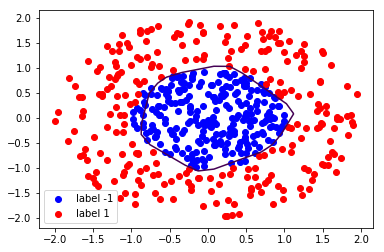

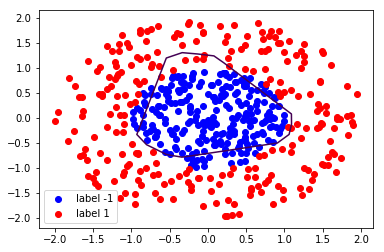

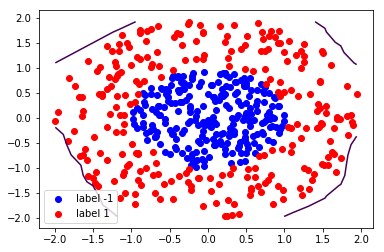

In [67]:
n= 250

#dataset
p = np.zeros((n,2))
lenght = np.sqrt(np.random.uniform(0, 1,n)) 
angle = np.pi*np.random.uniform(0, 2,n)     
p[:,0] = lenght*np.cos(angle)
p[:,1] = lenght*np.sin(angle)

q = np.zeros((n,2))
lenght = np.sqrt(np.random.uniform(1, 4,n))  
angle = np.pi*np.random.uniform(0, 2,n)
q[:,0] = lenght*np.cos(angle)
q[:,1] = lenght*np.sin(angle)

X = np.concatenate((p,q))

#labels
y_1 = - np.ones(p.shape[0])
y_2 = np.ones(q.shape[0])
y = np.concatenate((y_1,y_2))

#the neural network of interest
nn=TwoLayerNN(2,20)

#train the neural network
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.metrics import accuracy_score

list_1=np.linspace(0.1,0.5,3)
list_2= np.arange(5000,50000,5000) # 5000, 10000, 15000,....., 45000, 50000
for learning_rate in list_1 :
    print('learning rate ', learning_rate)
    least_squares_error = np.array([])
    for steps in list_2 :
         nn.sgd(x_train,y_train,learning_rate,20,steps) 
         error = (nn.feedForward(x_train) - y_train)**2
         error = np.sum(error)
         least_squares_error = np.append(least_squares_error,error)
    print('squares error vector :', least_squares_error)
    print('accuracy on train set :', accuracy_score(  y_train , np.where(nn.feedForward(x_train) >0,1,-1)  )   ) # steps=50000
    print('accuracy on test set :', accuracy_score(  y_test , np.where(nn.feedForward(x_test) >0,1,-1)  )   )    # steps= 50000
    
    plt.figure()
    
    #scatter plot of data
    plt.scatter(p[:,0],p[:,1],color='blue')
    plt.scatter(q[:,0],q[:,1],color='red')
    plt.legend(('label -1','label 1'))
    
    #contour line of learned classifier
    x_min = X[:,0].min()
    y_min = X[:,1].min()
    x_max = X[:,0].max()
    y_max = X[:,1].max()
    
    u = np.linspace(x_min,x_max, 20)
    v = np.linspace(y_min,y_max, 20)
    xx, yy = np.meshgrid(u,v) 
    xx_line = np.resize(xx,(20**2,1))
    yy_line = np.resize(yy,(20**2,1))         
    t = np.concatenate((xx_line,yy_line), axis = 1)
    z_pre=nn.feedForward(t)
    z_post = np.resize(z_pre,(20,20))  
    plt.contour(xx,yy,z_post, levels = [0])
    
    
    print('--------------------------------------------------------------------------------------------------------')